In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import plotly.express as px
import scipy
from skimage import color, exposure, measure, morphology, segmentation, util
from segmentflow import segment, view
%load_ext autoreload
%autoreload 2

In [24]:
ui = {}
ui['in_dir_path'] = Path(
    r'C:\Users\gusb\Research\mhe-analysis\data\IDOX Crystals STL\IDOX 1')
ui['spatial_res'] = 1  # Need to replace with real value
ui['slice_crop'] = [0, 500]
ui['row_crop'] = None
ui['col_crop'] = None
ui['file_suffix'] = '.tif'
ui['overwrite'] = True
ui['suppress_save_msg'] = True
ui['out_dir_path'] = Path(r'../results/IDOX_crystals_1')
ui['out_prefix'] = 'IDOX_crystals_1'
ui['slices'] = [100, 300, 400]
ui['nslices'] = 4
ui['exclude_borders'] = False
ui['exclude_borders_before_stl'] = True
ui['n_erosions'] = None
ui['post_seg_med_filter'] = False
ui['voxel_step_size'] = 1
show_checkpoints = True
checkpoint_save_dir = None

In [9]:
if not Path(ui['out_dir_path']).exists():
    Path(ui['out_dir_path']).mkdir(parents=True)
#-------------#
# Load images #
#-------------#
print()
labels = segment.load_images(
    ui['in_dir_path'],
    slice_crop=ui['slice_crop'],
    row_crop=ui['row_crop'],
    col_crop=ui['col_crop'],
    convert_to_float=True,
    file_suffix=ui['file_suffix']
)
labels = util.img_as_uint(labels)
if ui['exclude_borders']:
    # Subtract 1 to account for background label
    n_particles = len(np.unique(labels)) - 1
    print(
        '--> Number of particle(s) before border exclusion: ', str(n_particles))
    print('--> Excluding border particles...')
    labels = segmentation.clear_border(labels)
    # Calculate number of instances of each value in label_array
    particleIDs = np.unique(labels)
    # Subtract 1 to account for background label
    n_particles = len(np.unique(labels)) - 1
    print(
        '--> Number of particle(s) after border exclusion: ', str(n_particles))


Loading images...
--> Images loaded as 3D array:  (500, 1920, 1920)


Generating histogram...


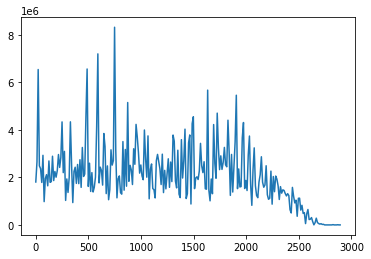

In [ ]:
fig, ax = view.histogram(labels[labels > 0])

--> Plotting images: [100, 300, 400]


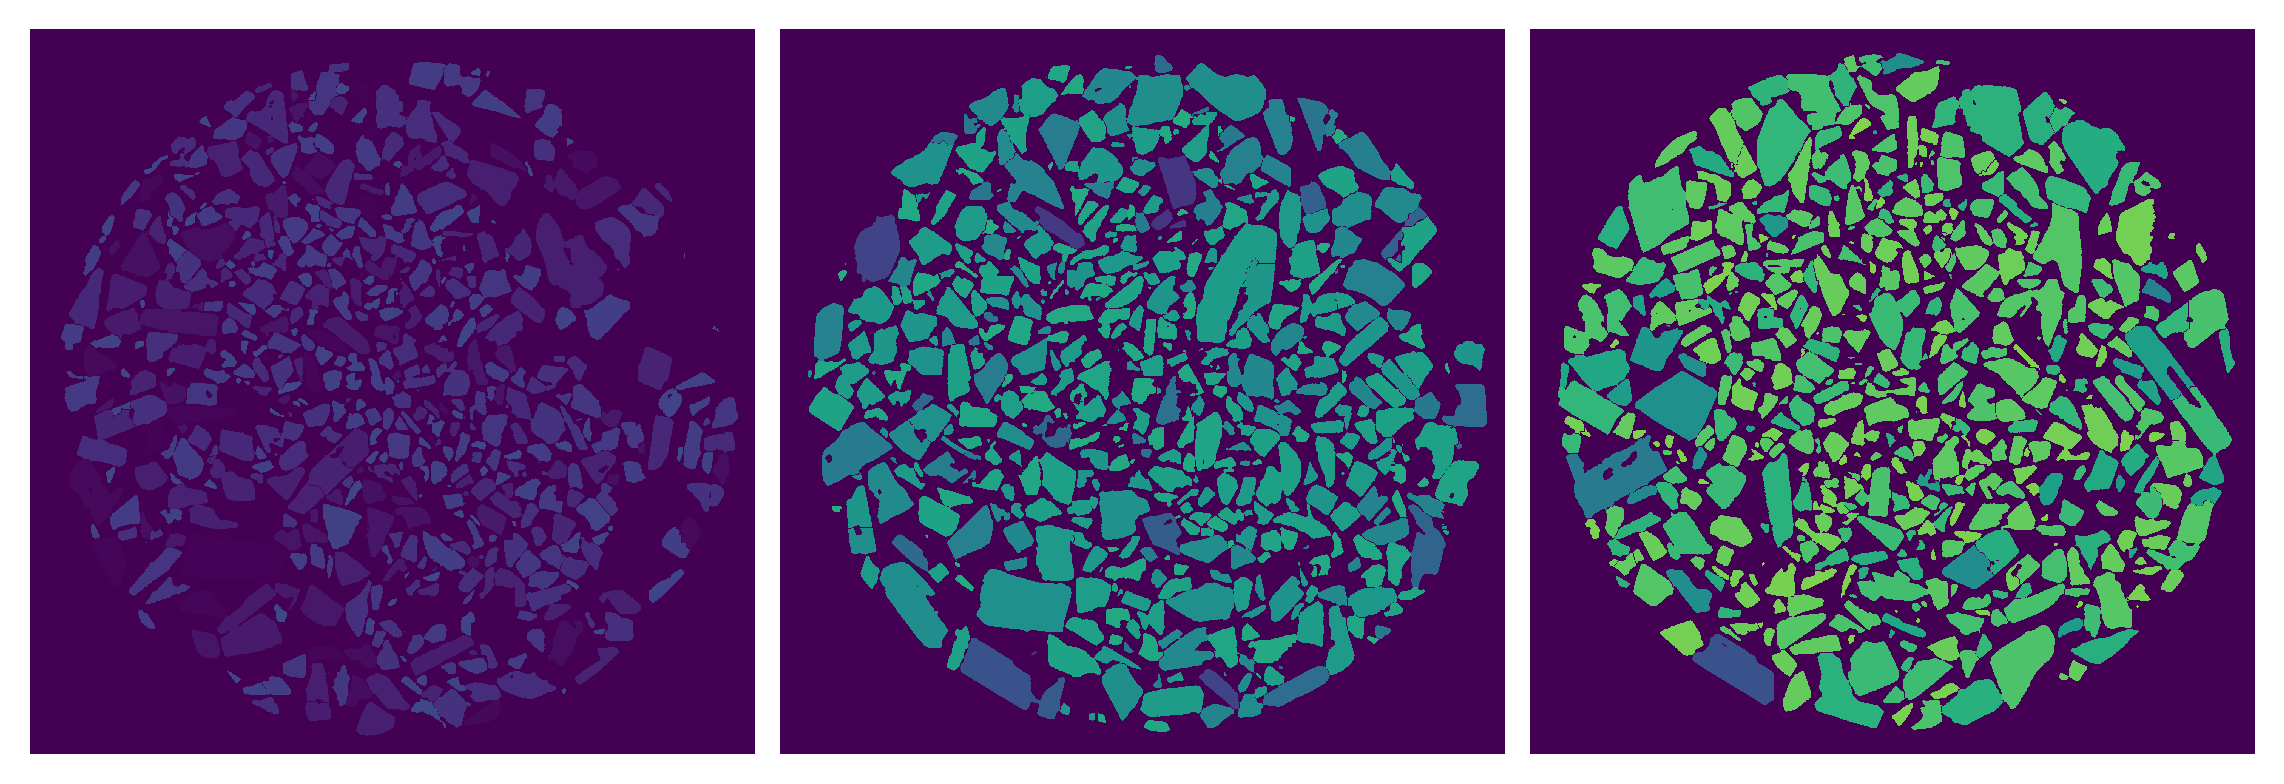

In [14]:
# %matplotlib qt
%matplotlib inline
fig, axes = view.vol_slices(
    labels,
    slices=ui['slices'],
    nslices=ui['nslices'],
    fig_w=7.5,
    dpi=300
)
fig_n = 0
segment.output_checkpoints(
    fig, show=show_checkpoints, save_path=checkpoint_save_dir,
    fn_n=fig_n, fn_suffix='semantic-seg-imgs')

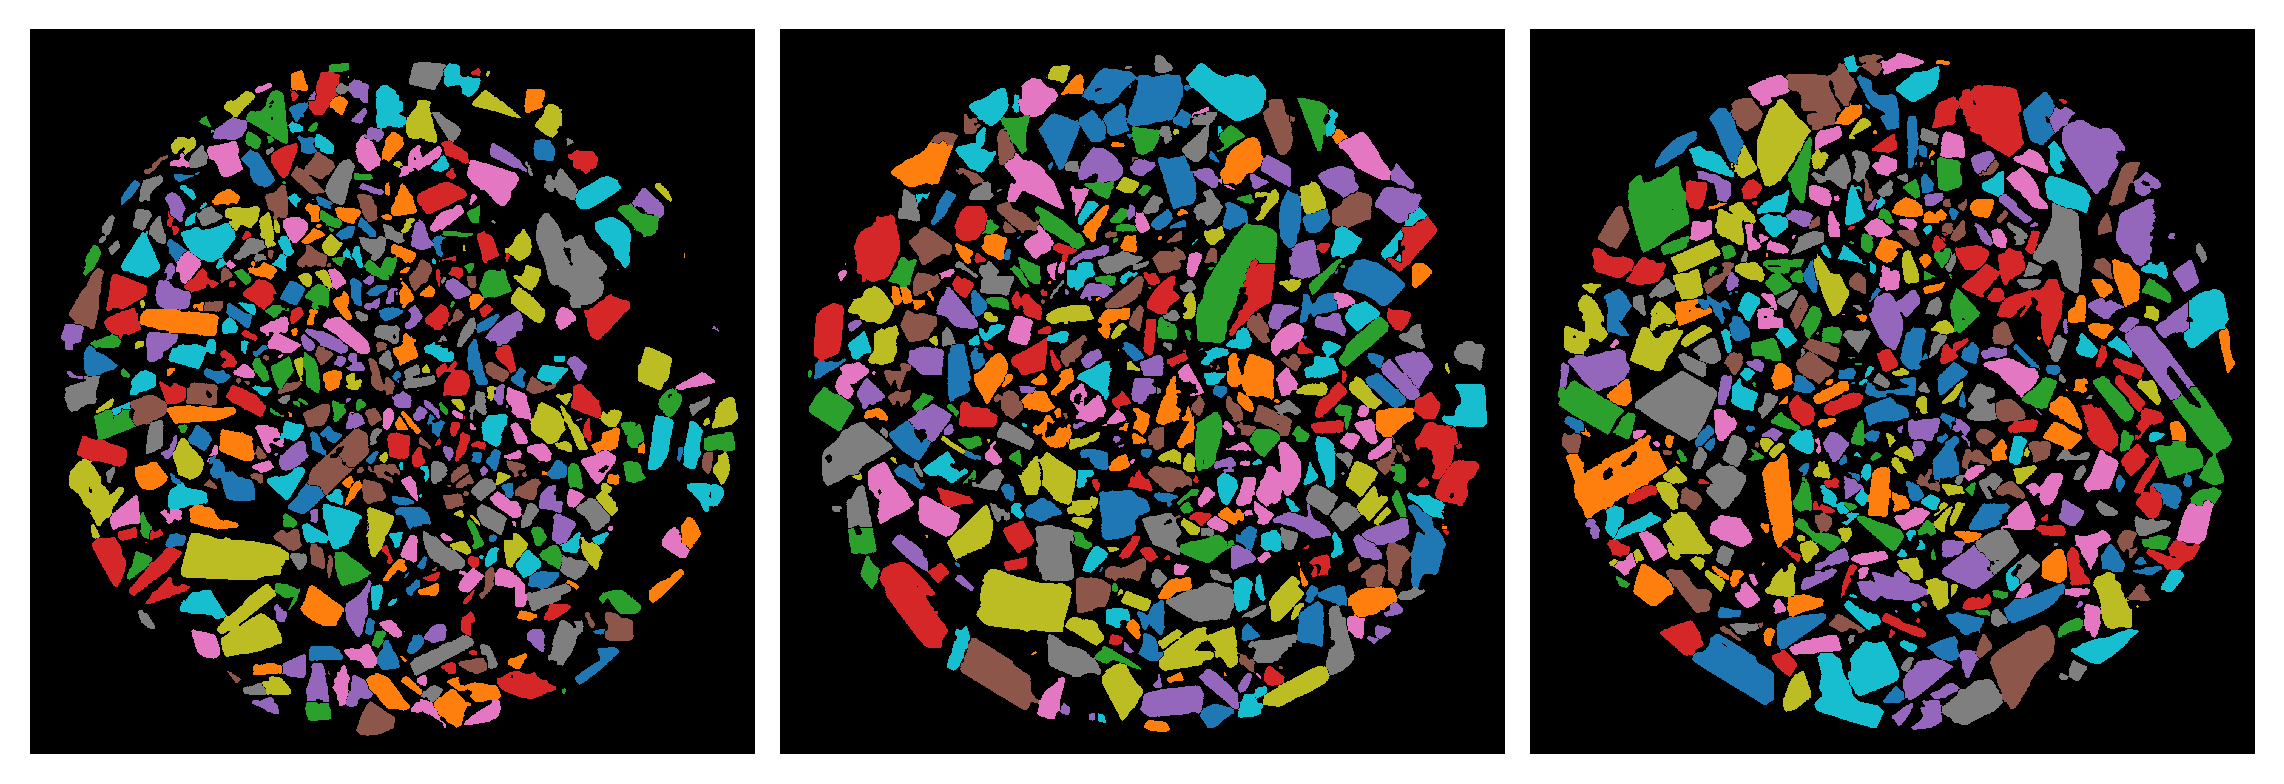

In [11]:
fig, ax = view.color_labels(labels, slices=ui['slices'])

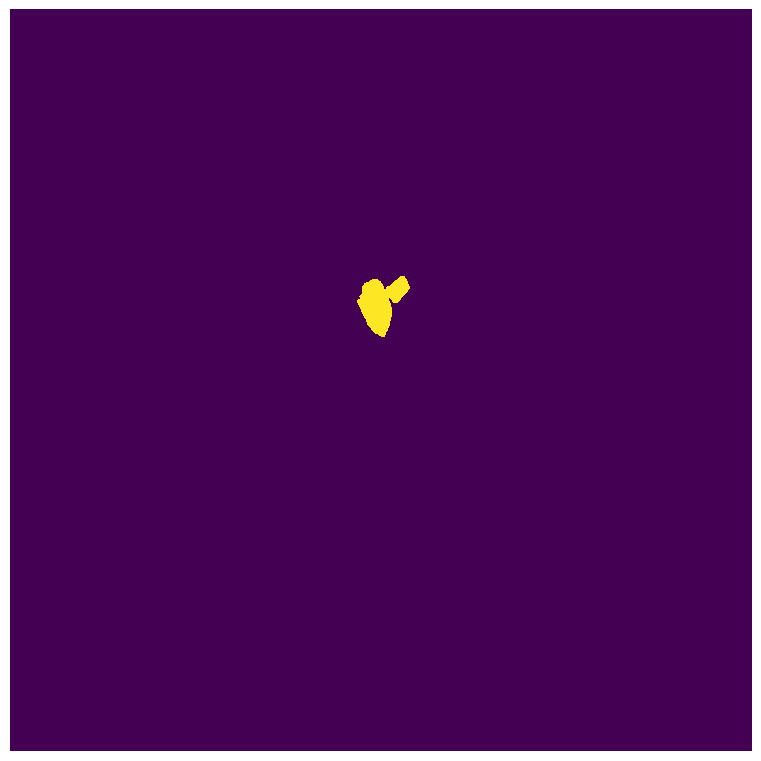

In [18]:
fig, axes = view.images(labels[ui['slices'][-1], ...]==2034)

In [23]:
if ui['exclude_borders_before_stl']:
    # Subtract 1 to account for background label
    n_particles = len(np.unique(labels)) - 1
    print(
        '--> Number of particle(s) before border exclusion: ', str(n_particles))
    print('--> Excluding border particles...')
    labels = segmentation.clear_border(labels)
    # Calculate number of instances of each value in label_array
    particleIDs = np.unique(labels)
    # Subtract 1 to account for background label
    n_particles = len(np.unique(labels)) - 1
    print(
        '--> Number of particle(s) after border exclusion: ', str(n_particles))
segment.save_as_stl_files(
    labels,
    ui['out_dir_path'],
    ui['out_prefix'],
    suppress_save_msg=ui['suppress_save_msg'],
    slice_crop=ui['slice_crop'],
    row_crop=ui['row_crop'],
    col_crop=ui['col_crop'],
    stl_overwrite=ui['overwrite'],
    spatial_res=ui['spatial_res'],
    n_erosions=ui['n_erosions'],
    median_filter_voxels=ui['post_seg_med_filter'],
    voxel_step_size=ui['voxel_step_size'],
)

Generating surface meshes...


KeyboardInterrupt: 

In [4]:
i4102_path = Path(
    r'C:\Users\gusb\Research\mhe-analysis\data\I41.02\4bin_4x_bhc')
imgs = segment.load_images(i4102_path)
imgs_pre = segment.preprocess(
    imgs, median_filter=True, rescale_intensity_range=[0.01, 99.9])

Loading images...
--> Images loaded as 3D array:  (495, 505, 495)
Preprocessing images...
--> Applying median filter...
--> Rescaling intensities to percentile range [0.01, 99.9]...
--> Preprocessing complete.


Generating histogram...


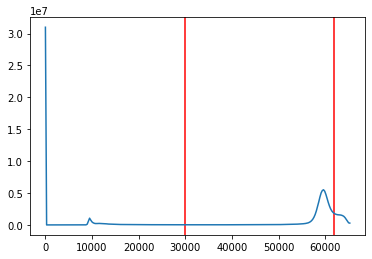

In [24]:
thresholds = [30000, 62000]
fig, ax = view.histogram(imgs_pre, mark_values=thresholds)

--> Plotting images: [100, 200, 300, 400]


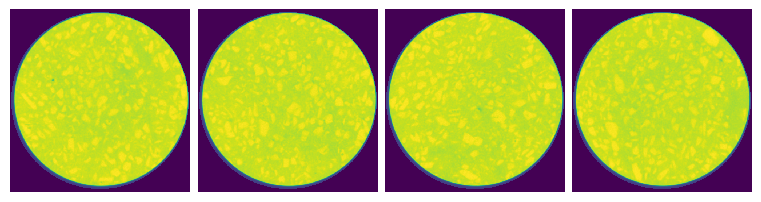

In [26]:
slices = [100, 200, 300, 400]
fig, axes = view.slices(imgs_pre, slices=slices)

--> Plotting images: [100, 200, 300, 400]


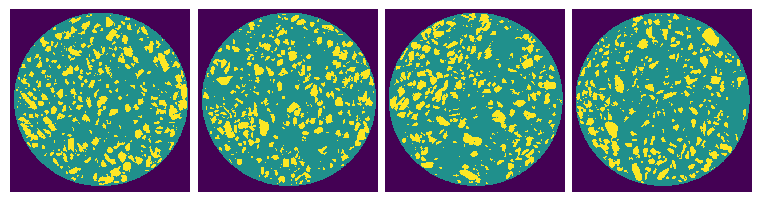

In [27]:
imgs_semantic = segment.isolate_classes(imgs_pre, thresholds)
fig, axes = view.slices(imgs_semantic, slices=slices)